##################################################
## Project: IBM Hr analytics employee attrition performance
## Script purpose: Employee attrition performance
## Date: 31/3/2020
## Author: Abhishek S R
##################################################

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [5]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

'`EmployeeCount`', '`Over18`', '`StandardHours`'  and '`EmployeeNumber`' 
This features aren't useful, So I am going to drop those columns.

In [6]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

## Categorical Features

In [7]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human 

In [8]:
len(object_col)

7

In [9]:
label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

## Numerical Features

#  discrete values

In [10]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        #print(f"{column} : {df[column].unique()}")
        #print(df[column].value_counts())
        disc_col.append(column)
        #print("====================================")
disc_col.remove('Attrition')

# continous values

In [11]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 25:
        #print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        #print("====================================")

## Data Visualisation

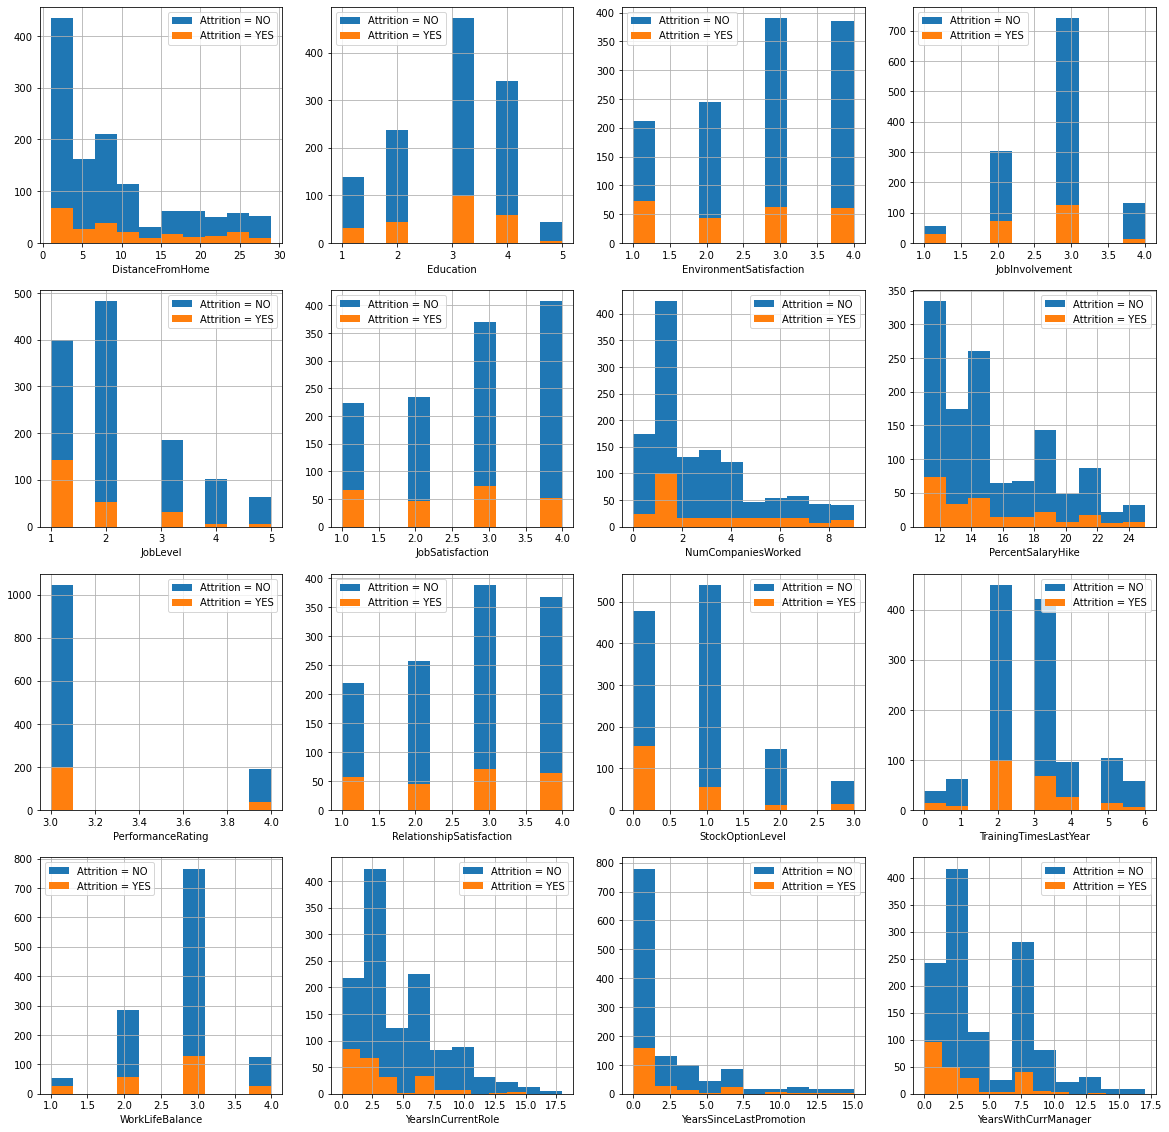

In [12]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(disc_col, 1):
    plt.subplot(4, 4, i)
    df[df["Attrition"] == 0][column].hist(label='Attrition = NO')
    df[df["Attrition"] == 1][column].hist(label='Attrition = YES')
    plt.legend()
    plt.xlabel(column)

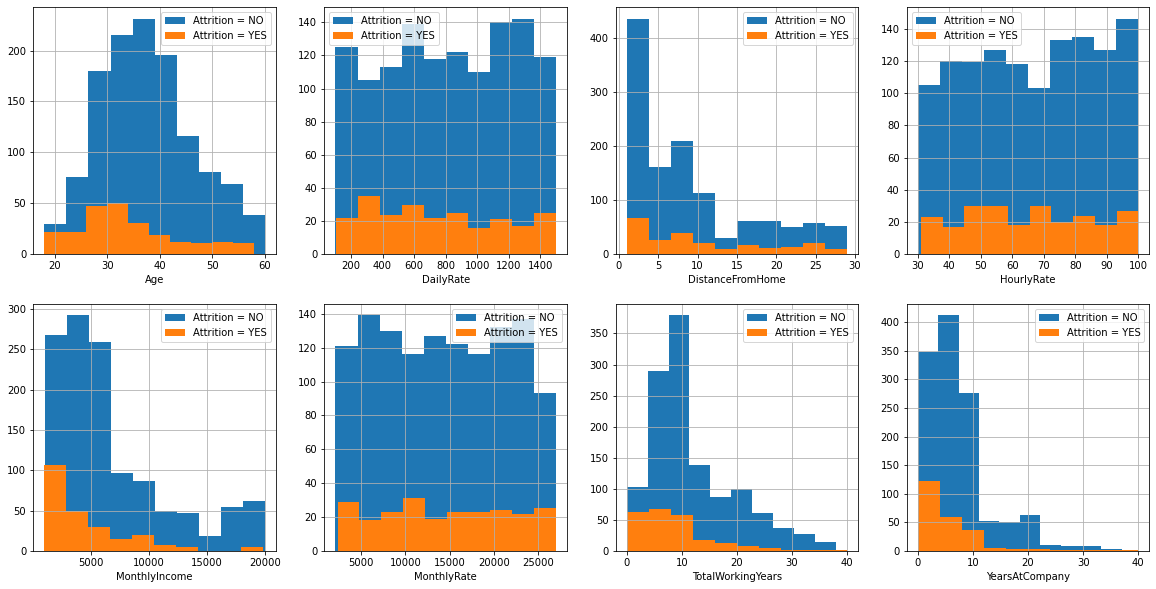

In [13]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(cont_col, 1):
    plt.subplot(2, 4, i)
    df[df["Attrition"] == 0][column].hist(label='Attrition = NO')
    df[df["Attrition"] == 1][column].hist(label='Attrition = YES')
    plt.legend()
    plt.xlabel(column)

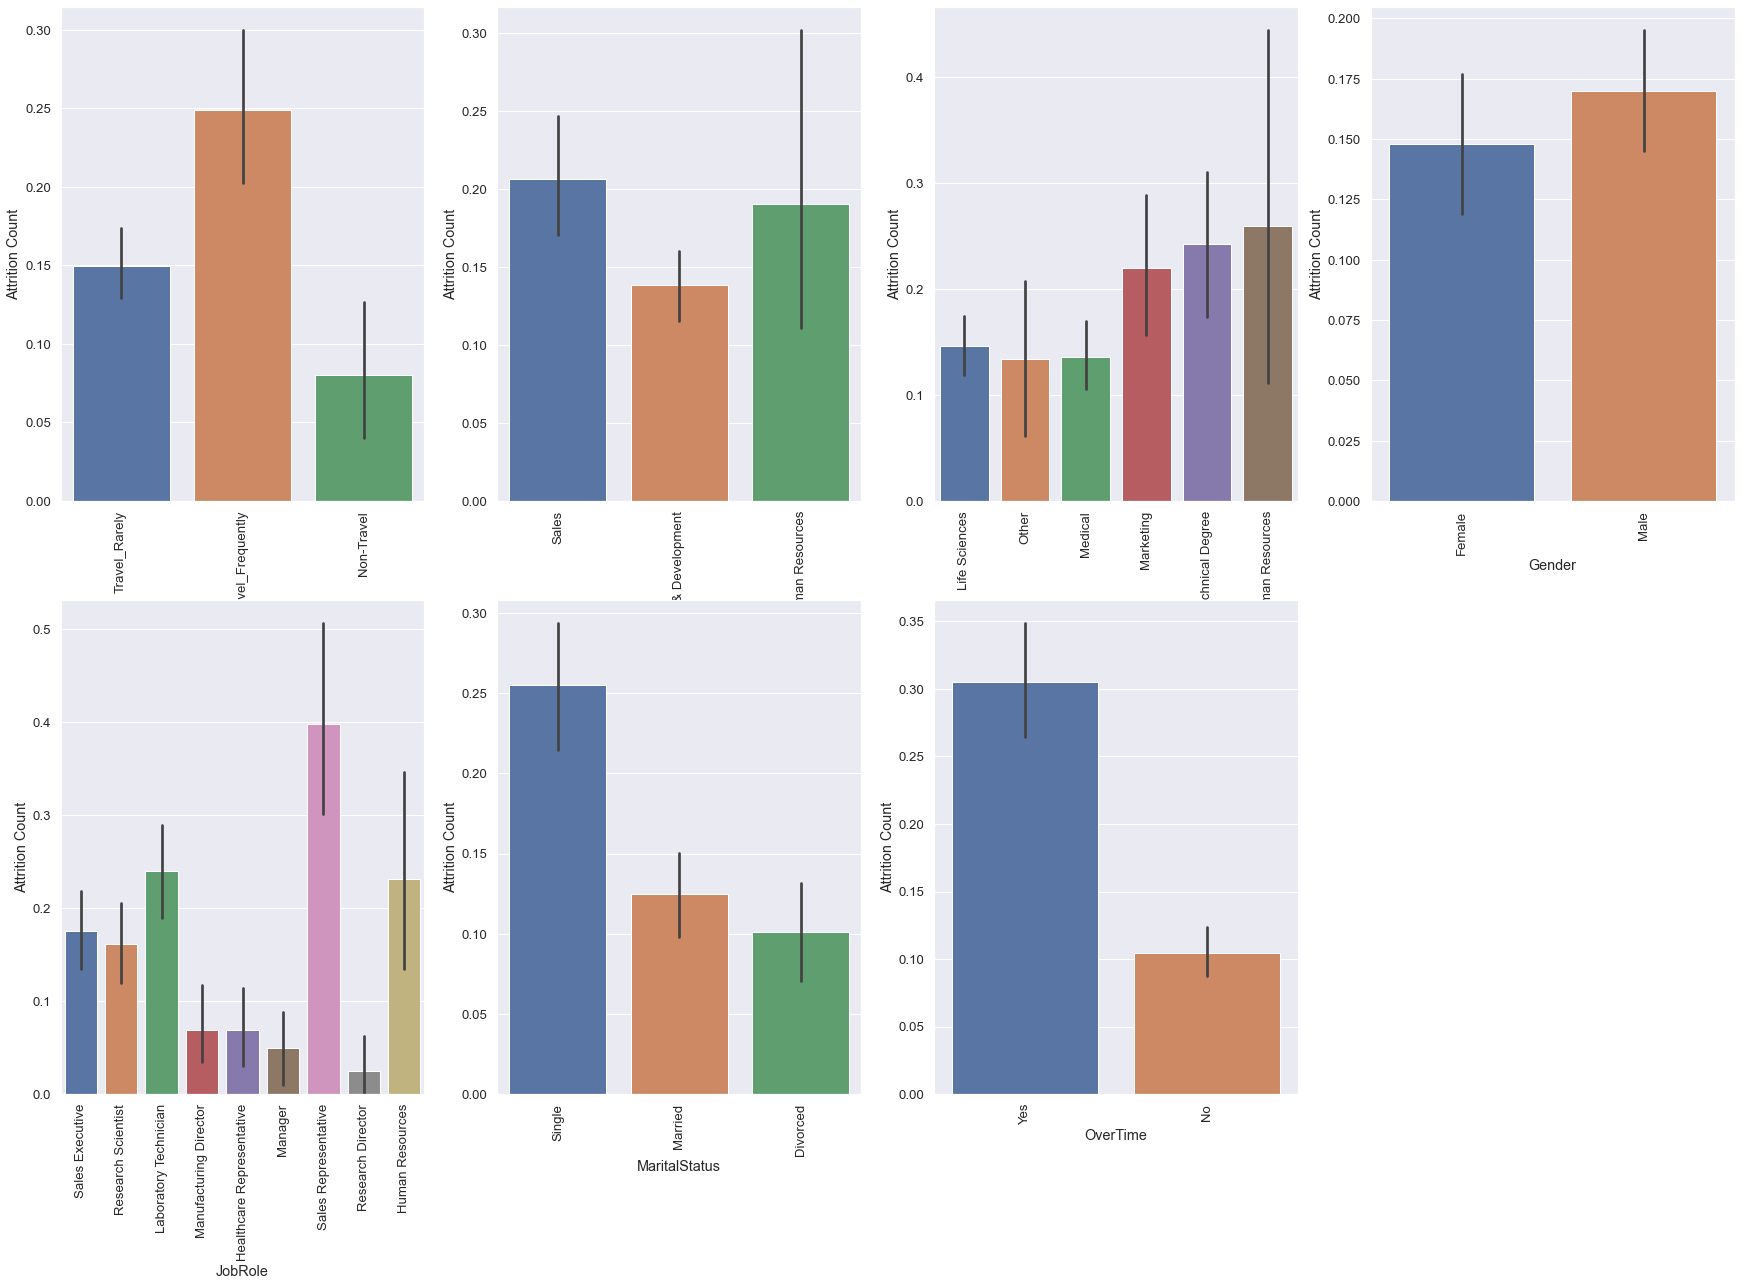

In [14]:
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 20))


for i, column in enumerate(object_col, 1):
    plt.subplot(2, 4, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

**Conclusions:**

***
- Employee with low `JobLevel`, `MonthlyIncome`, `YearAtCompany`, and `TotalWorkingYears` are more likely to quit.
- `BusinessTravel` : Employee who travel alot are more likely to quit.

- `Department` :Employee in `Research & Development` are more likely to stay.

- `EducationField` : Employee with `Human Resources` and `Technical Degree` are more likely to quit.

- `Gender` :`Male` employee are more likely to quit.

- `JobRole` : Employee in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit.

- `MaritalStatus` :Employee who are `Single` are more likely to quit the `Married`, and `Divorced`.

- `OverTime` :Employee who work more hours are likely to quit.

*** 

# Data Processing

In [15]:
for column in object_col:
    df[column] = label.fit_transform(df[column])

In [16]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


#  Feature Importance

In [17]:
X = df.drop('Attrition', axis = 1)
y = df['Attrition']
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, y)
for importance,feature in zip(model.feature_importances_,df.columns):
    print('{}: {}'.format(feature,importance))

Age: 0.04471322517303618
Attrition: 0.02306919893301092
BusinessTravel: 0.030814675612623403
DailyRate: 0.02483577429371062
Department: 0.03694094450935043
DistanceFromHome: 0.027426303515858307
Education: 0.030429567369336313
EducationField: 0.03781593241803444
EnvironmentSatisfaction: 0.022100778456840633
Gender: 0.031225528089341148
HourlyRate: 0.0331554927977111
JobInvolvement: 0.0348890802953516
JobLevel: 0.03320618866709002
JobRole: 0.03692740771085074
JobSatisfaction: 0.03448886657846011
MaritalStatus: 0.040605803844900666
MonthlyIncome: 0.0319031153620116
MonthlyRate: 0.03325805248969931
NumCompaniesWorked: 0.06929869232813826
OverTime: 0.03059765881890084
PercentSalaryHike: 0.012734129051493195
PerformanceRating: 0.03270486259808033
RelationshipSatisfaction: 0.032896015441738057
StockOptionLevel: 0.039453919607807204
TotalWorkingYears: 0.029908302938734758
TrainingTimesLastYear: 0.03400329236045529
WorkLifeBalance: 0.034143295576129065
YearsAtCompany: 0.03254681516172333
Years

In [18]:
col12 = ["Attrition", "Age", "BusinessTravel", "Department", "DistanceFromHome", "EducationField", "HourlyRate", "JobInvolvement", "JobLevel", "JobRole", "JobSatisfaction", "MaritalStatus", "MonthlyRate", "NumCompaniesWorked", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole"]   
df[col12].head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,EducationField,HourlyRate,JobInvolvement,JobLevel,JobRole,...,MaritalStatus,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,1,41,2,2,1,1,94,3,2,7,...,2,19479,8,3,1,0,0,1,6,4
1,0,49,1,1,8,1,61,2,2,6,...,1,24907,1,4,4,1,3,3,10,7
2,1,37,2,1,2,4,92,2,1,2,...,2,2396,6,3,2,0,3,3,0,0
3,0,33,1,1,3,1,56,3,1,6,...,1,23159,1,3,3,0,3,3,8,7
4,0,27,2,1,2,3,40,3,1,2,...,1,16632,9,3,4,1,3,3,2,2


# Applying machine learning algorithms

In [19]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Decision Tree Classifier

In [20]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20)), 
          }

X = df[col12].drop("Attrition", axis="columns")
y = df.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

In [21]:
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 2260 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 6260 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 11860 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   56.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                       

In [22]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=17, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [23]:
tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=17, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [24]:
tree.fit(X_train, y_train)

d:\ibm-hr-analytics-attrition-dataset\hr-analytics\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=17, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [25]:
print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.8533

Classification Report: 
 	Precision: 0.7659574468085106
	Recall Score: 0.20454545454545456
	F1 score: 0.32286995515695066

Confusion Matrix: 
 [[842  11]
 [140  36]]

Test Result:
accuracy score: 0.8526077097505669

Classification Report: 
 	Precision: 0.3888888888888889
	Recall Score: 0.11475409836065574
	F1 score: 0.17721518987341772

Confusion Matrix: 
 [[369  11]
 [ 54   7]]



# Gradient Boosting Classifier

In [26]:
gbc = GradientBoostingClassifier(random_state = 42)
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
cv = GridSearchCV(gbc,parameters, scoring="accuracy", 
                                n_jobs=-1, verbose=1, cv=3, iid=True)

In [27]:
cv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished
d:\ibm-hr-analytics-attrition-dataset\hr-analytics\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [28]:
cv.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [29]:
gbc1 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [30]:
gbc1.fit(X_train, y_train)

d:\ibm-hr-analytics-attrition-dataset\hr-analytics\lib\site-packages\sklearn\ensemble\_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [31]:
print_score(gbc1, X_train, y_train, X_test, y_test, train=True)
print_score(gbc1, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.8805

Classification Report: 
 	Precision: 0.8354430379746836
	Recall Score: 0.375
	F1 score: 0.5176470588235295

Confusion Matrix: 
 [[840  13]
 [110  66]]

Test Result:
accuracy score: 0.8616780045351474

Classification Report: 
 	Precision: 0.5
	Recall Score: 0.21311475409836064
	F1 score: 0.29885057471264365

Confusion Matrix: 
 [[367  13]
 [ 48  13]]



## Random Forest

In [32]:
param_grid = {'max_depth':[3, None], 
              'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 10], 
              'bootstrap':[True, False],
              'n_estimators':[100, 500, 1000, 1500],
              'criterion':["gini", "entropy"]}

rand_frst_clf = RandomForestClassifier(random_state=42, n_estimators=1000)

grid_rand_forest = GridSearchCV(rand_frst_clf, param_grid, scoring="accuracy", 
                                n_jobs=-1, verbose=1, cv=3, iid=True)

In [33]:
grid_rand_forest.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 14.0min finished
d:\ibm-hr-analytics-attrition-dataset\hr-analytics\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=1000, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

In [34]:
grid_rand_forest.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [35]:
rand_forest = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

rand_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [36]:
print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 1.0
	F1 score: 1.0

Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
accuracy score: 0.8571428571428571

Classification Report: 
 	Precision: 0.45
	Recall Score: 0.14754098360655737
	F1 score: 0.22222222222222224

Confusion Matrix: 
 [[369  11]
 [ 52   9]]



## XGBoost Classifier

In [37]:
xgb_model = XGBClassifier()

n_estimators = [50, 100, 150, 200]
max_depth = [2, 3, 5]
booster = ['gbtree', 'gblinear']
base_score = [0.2, 0.25, 0.5, 0.75]
learning_rate = [0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

hyperparameter_grid = {'n_estimators': n_estimators, 
                       'max_depth': max_depth, 
                       'learning_rate' : learning_rate, 
                       'min_child_weight' : min_child_weight,
                       'booster' : booster, 
                       'base_score' : base_score}

xgb_grid_search_cv = GridSearchCV(xgb_model, hyperparameter_grid, scoring="roc_auc", 
                                  n_jobs=-1, verbose=1, cv=3, iid=True)

In [ ]:
xgb_grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.4min


In [ ]:
xgb_grid_search_cv.best_estimator_

In [ ]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.15, max_delta_step=0, max_depth=2,
              min_child_weight=2, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

xgb.fit(X_train, y_train)

In [ ]:
print_score(xgb, X_train, y_train, X_test, y_test, train=True)
print_score(xgb, X_train, y_train, X_test, y_test, train=False)